In [265]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.cluster import k_means
from sklearn.cluster import KMeans

In [159]:
!unzip archive.zip

/bin/sh: 1: unzip: not found


In [162]:
df = pd.read_csv('tv_shows.csv', index_col='ID')

In [163]:
df.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,,,
1,0,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
2,1,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
3,2,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
4,3,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
5,4,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [164]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368 entries, 1 to 5717
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            5368 non-null   object
 1   Year             5368 non-null   int64 
 2   Age              3241 non-null   object
 3   IMDb             4406 non-null   object
 4   Rotten Tomatoes  5368 non-null   object
 5   Netflix          5368 non-null   int64 
 6   Hulu             5368 non-null   int64 
 7   Prime Video      5368 non-null   int64 
 8   Disney+          5368 non-null   int64 
 9   Type             5368 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 461.3+ KB


In [166]:
df.isnull().sum()

Title                 0
Year                  0
Age                2127
IMDb                962
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

In [167]:
df['Age'].value_counts()

16+    995
18+    854
7+     831
all    552
13+      9
Name: Age, dtype: int64

In [168]:
import warnings
warnings.filterwarnings(action='ignore')

In [169]:
pd.set_option('display.max_rows',500)

## IMDb

In [176]:
df['IMDb']

ID
1       9.4/10
2       8.7/10
3       9.0/10
4       8.8/10
5       8.8/10
         ...  
5713       NaN
5714       NaN
5715       NaN
5716       NaN
5717       NaN
Name: IMDb, Length: 5368, dtype: object

In [215]:
df1 = df[~df['IMDb'].notna()==False]

In [216]:
df.shape,df1.shape

((5368, 10), (4406, 10))

In [217]:
df1['IMDb'].value_counts()

7.4/10    208
7.3/10    191
7.6/10    191
7.5/10    183
7.8/10    180
7.2/10    173
7.7/10    170
8.1/10    164
7.1/10    164
8.0/10    160
7.0/10    155
7.9/10    140
6.8/10    135
6.6/10    133
6.7/10    133
6.9/10    132
8.2/10    130
6.5/10    130
8.3/10    123
8.4/10    112
6.4/10    100
6.2/10     96
8.5/10     83
6.3/10     82
8.6/10     73
6.0/10     69
6.1/10     63
5.7/10     56
5.8/10     49
5.9/10     46
8.7/10     46
5.6/10     41
8.8/10     39
5.4/10     39
5.5/10     39
4.9/10     29
5.2/10     28
5.0/10     28
5.3/10     25
4.8/10     18
4.6/10     18
4.4/10     17
5.1/10     17
4.5/10     16
4.7/10     14
8.9/10     14
9.0/10     13
4.2/10     12
4.3/10     12
3.6/10     11
3.8/10     11
9.1/10     10
4.1/10      9
4.0/10      7
3.9/10      7
3.2/10      6
9.3/10      5
3.3/10      5
9.2/10      5
3.4/10      5
3.7/10      4
3.5/10      4
2.5/10      3
2.4/10      3
2.6/10      2
9.4/10      2
1.8/10      2
2.8/10      2
2.9/10      2
9.6/10      2
2.3/10      2
3.1/10

In [222]:
df1['IMDb'].iloc[0][:-3]

''

In [219]:
df1['IMDb'] = df1['IMDb'].apply(lambda x: str(x)[:-3])

In [225]:
df1['IMDb'] = pd.to_numeric(df1['IMDb'], errors='coerce')

In [226]:
df1['IMDb']

ID
1       9.4
2       8.7
3       9.0
4       8.8
5       8.8
       ... 
5687    7.5
5688    3.2
5690    5.4
5691    7.7
5692    6.4
Name: IMDb, Length: 4406, dtype: float64

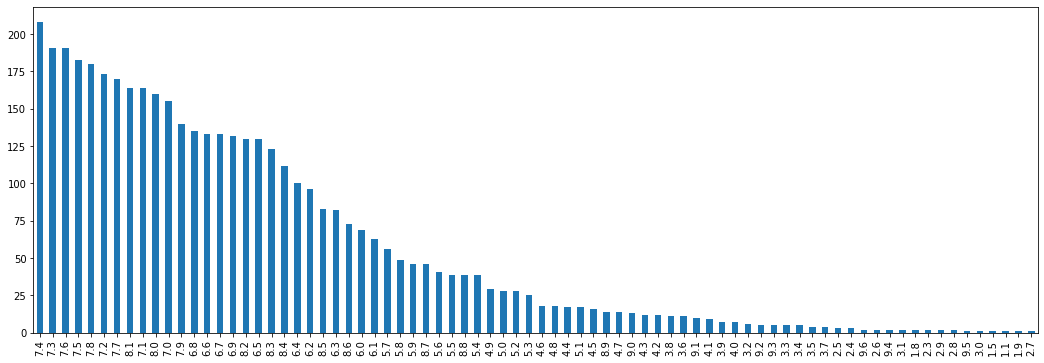

In [227]:
plt.figure(figsize=(18,6))
df1['IMDb'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

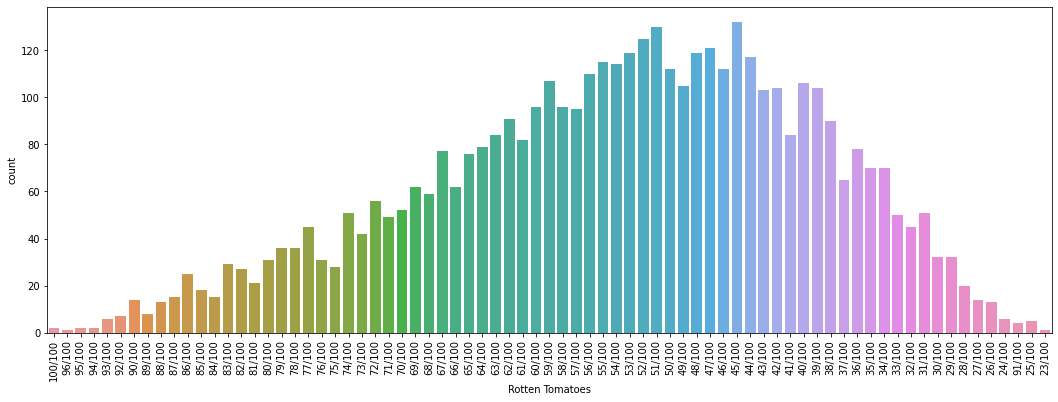

In [228]:
plt.figure(figsize=(18,6))
sns.countplot(df1['Rotten Tomatoes'])
plt.xticks(rotation=90)
plt.show()

In [229]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4406 entries, 1 to 5692
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            4406 non-null   object 
 1   Year             4406 non-null   int64  
 2   Age              3207 non-null   object 
 3   IMDb             4406 non-null   float64
 4   Rotten Tomatoes  4406 non-null   object 
 5   Netflix          4406 non-null   int64  
 6   Hulu             4406 non-null   int64  
 7   Prime Video      4406 non-null   int64  
 8   Disney+          4406 non-null   int64  
 9   Type             4406 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 507.7+ KB


In [230]:
df1['Rotten Tomatoes'].dtype

dtype('O')

In [231]:
df1['Rotten Tomatoes'].iloc[2][:-4]

'95'

In [232]:
df1['Rotten Tomatoes'] = df1['Rotten Tomatoes'].apply(lambda x:str(x)[:-4])

In [233]:
df1['Rotten Tomatoes']

ID
1       100
2        96
3        95
4        94
5        93
       ... 
5687     30
5688     30
5690     29
5691     28
5692     28
Name: Rotten Tomatoes, Length: 4406, dtype: object

In [234]:
df1['Rotten Tomatoes'] = pd.to_numeric(df1['Rotten Tomatoes'], errors='coerce')

In [235]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4406 entries, 1 to 5692
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            4406 non-null   object 
 1   Year             4406 non-null   int64  
 2   Age              3207 non-null   object 
 3   IMDb             4406 non-null   float64
 4   Rotten Tomatoes  4406 non-null   int64  
 5   Netflix          4406 non-null   int64  
 6   Hulu             4406 non-null   int64  
 7   Prime Video      4406 non-null   int64  
 8   Disney+          4406 non-null   int64  
 9   Type             4406 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 507.7+ KB


## Age

In [236]:
df1[df1['Age'].notna()==False]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,,
121,Bridgerton,2020,NaN,7.3,79,1,0,0,0,1
200,The Haunting of Bly Manor,2020,NaN,7.4,74,1,0,0,0,1
204,Young Royals,2021,NaN,8.6,74,1,0,0,0,1
244,Better Than Us,2018,NaN,7.4,72,1,0,0,0,1
251,Flowers,2016,NaN,8.2,72,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5681,Out There with Jack Randall,2019,NaN,7.0,33,0,0,0,1,1
5683,United States of Animals,2016,NaN,6.3,32,0,0,0,1,1
5685,Rocky Mountain Animal Rescue,2018,NaN,7.9,30,0,0,0,1,1


In [237]:
df1['Age'].mode()[0]

'16+'

In [238]:
df1['Age'].fillna(df1['Age'].mode()[0], inplace = True)

In [239]:
df1['Age'].value_counts()

16+    2186
18+     852
7+      824
all     535
13+       9
Name: Age, dtype: int64

In [240]:
df1['Age'] = df1['Age'].apply(lambda x:0 if x=='all' else(
    18 if x=='18+' else (7 if x=='7+' else(13 if x=='13+' else(16 if x=='16+'))) ))

SyntaxError: invalid syntax (<ipython-input-240-0cc449ffc366>, line 2)

In [241]:
df1['Age'] = df1['Age'].replace('all',0)
df1['Age'] = df1['Age'].replace('18+',18)
df1['Age'] = df1['Age'].replace('7+',7)
df1['Age'] = df1['Age'].replace('13+',13)
df1['Age'] = df1['Age'].replace('16+',16)

In [242]:
df1['Age'].value_counts()

16    2186
18     852
7      824
0      535
13       9
Name: Age, dtype: int64

In [243]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4406 entries, 1 to 5692
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            4406 non-null   object 
 1   Year             4406 non-null   int64  
 2   Age              4406 non-null   int64  
 3   IMDb             4406 non-null   float64
 4   Rotten Tomatoes  4406 non-null   int64  
 5   Netflix          4406 non-null   int64  
 6   Hulu             4406 non-null   int64  
 7   Prime Video      4406 non-null   int64  
 8   Disney+          4406 non-null   int64  
 9   Type             4406 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 507.7+ KB


## Analysis of Nuerical Data

In [244]:
px.histogram(df1['Year'])

In [251]:
print("Shows With Highest IMDB values")
print(df1.sort_values(['IMDb'],ascending=False)[['Title', 'IMDb']][:20])

Shows With Highest IMDB values
                                  Title  IMDb
ID                                           
4054  The Secret World of Nature: Spain   9.6
5401                              Bluey   9.6
3818                       Malgudi Days   9.5
1                          Breaking Bad   9.4
5623               Alaska Animal Rescue   9.4
81                           Our Planet   9.3
3246                       Hungry Henry   9.3
4003                    Everyday Driver   9.3
2034                             Cosmos   9.3
6            Avatar: The Last Airbender   9.3
3668                    Clarkson's Farm   9.2
1960                     Rick and Morty   9.2
5435            Cosmos: Possible Worlds   9.2
4017            Harmony with A R Rahman   9.2
4396                     Becoming a Man   9.2
1004                             Okupas   9.1
202                    Leyla ile Mecnun   9.1
403                           My Mister   9.1
26     Fullmetal Alchemist: Brotherhood   9.1
435

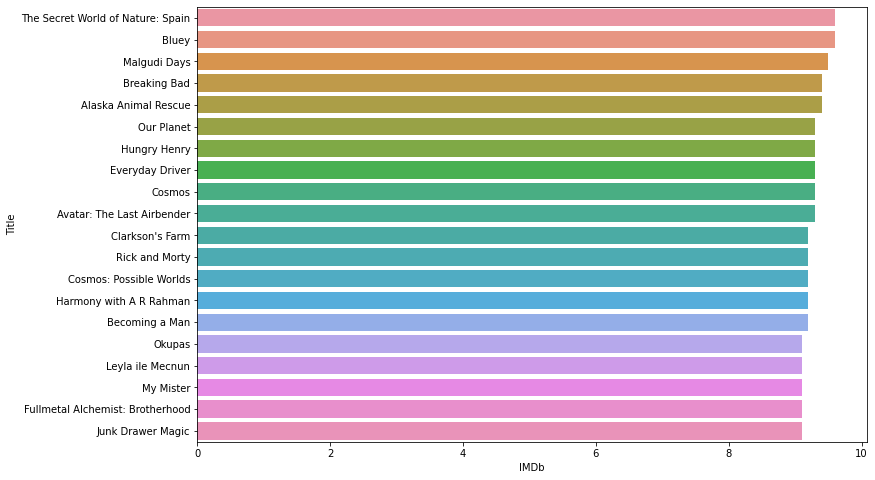

In [257]:
plt.figure(figsize=(12,8))
sns.barplot(x='IMDb', y='Title', data=df1.sort_values(['IMDb'],ascending=False)[:20])
plt.show()

In [252]:
print("Shows With Lowest IMDB values")
print(df1.sort_values(['IMDb'],ascending=True)[['Title', 'IMDb']][:20])

Shows With Lowest IMDB values
                                Title  IMDb
ID                                         
1543                      Racket Boys   1.1
3305   A Little Late with Lilly Singh   1.5
3149                My Super Sweet 16   1.8
3176                Toddlers & Tiaras   1.8
3282                     The Proposal   1.9
3012                       Metástasis   2.3
1900                 Game Winning Hit   2.3
4751                     Strange Love   2.4
4764                  Favorite Places   2.4
3412                    AwesomenessTV   2.4
3058                     Breadwinners   2.5
3375             HobbyKids Adventures   2.5
1797                     The Goop Lab   2.5
3219                         The View   2.6
3220        The Celebrity Dating Game   2.6
1872                   Jusqu'à l'Aube   2.7
2718  Keeping Up with the Kardashians   2.8
4761               ViR: The Robot Boy   2.8
3352       Last Call with Carson Daly   2.9
4716     The World's Funniest Moments   2.9


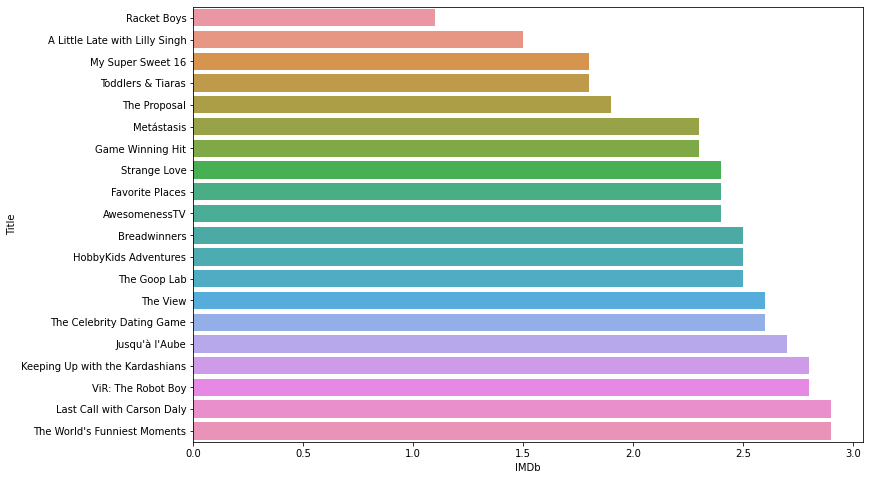

In [256]:
plt.figure(figsize=(12,8))
sns.barplot(x='IMDb', y='Title', data=df1.sort_values(['IMDb'],ascending=True)[:20])
plt.show()

In [260]:
px.scatter(data_frame=df1, y='IMDb')

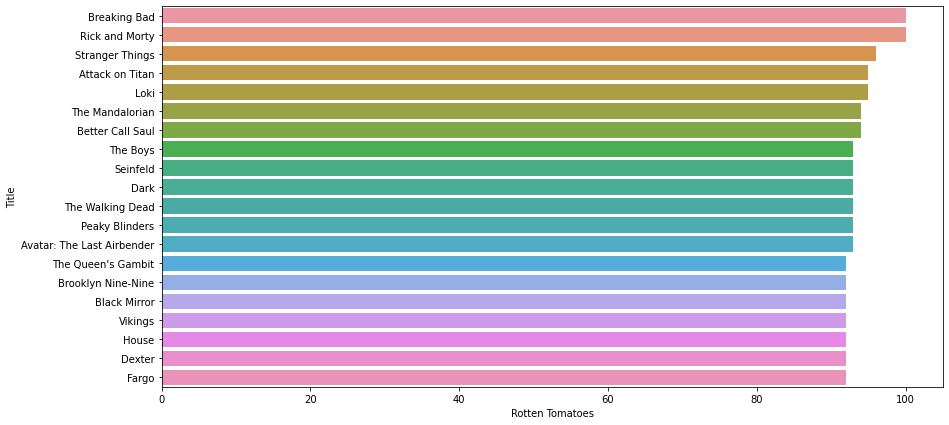

In [263]:
plt.figure(figsize=(14,7))
sns.barplot(x='Rotten Tomatoes', y='Title', data=df1.sort_values(['Rotten Tomatoes'], ascending=False)[:20])
plt.show()

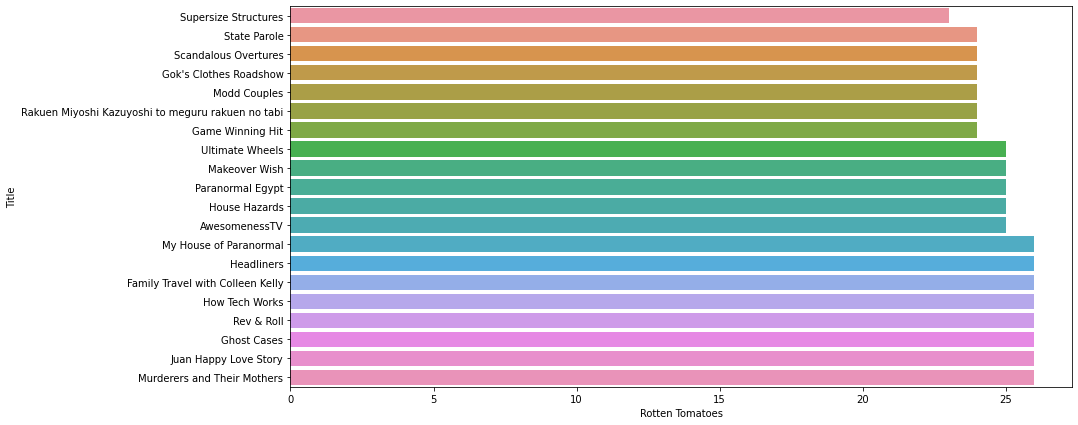

In [264]:
plt.figure(figsize=(14,7))
sns.barplot(x='Rotten Tomatoes', y='Title', data=df1.sort_values(['Rotten Tomatoes'], ascending=True)[:20])
plt.show()

# Clustering

In [276]:
cluster_data = df1[['Title',  'IMDb', 'Rotten Tomatoes']]

In [277]:
cluster_data['IMDb'] = cluster_data['IMDb']*10

In [278]:
X = cluster_data[['IMDb', 'Rotten Tomatoes']]

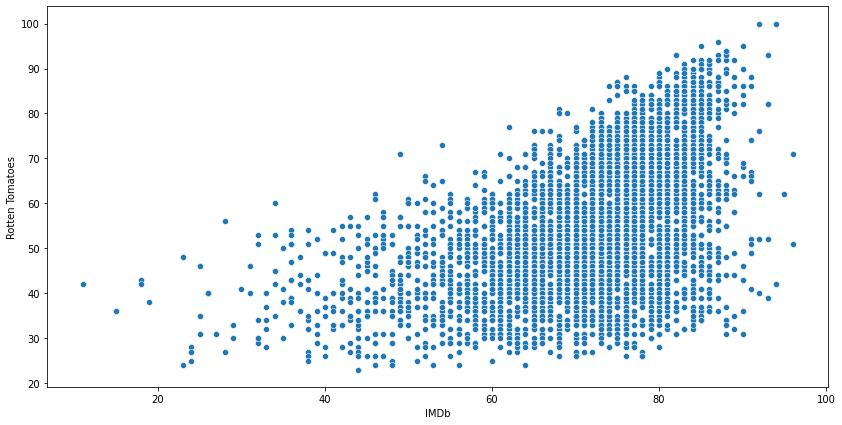

In [280]:
plt.figure(figsize=(14,7))
sns.scatterplot(x='IMDb', y='Rotten Tomatoes', data=X)
plt.show()

In [268]:
km = KMeans(n_clusters=2)

In [ ]:
km.

In [283]:
wcss= []                                 # Within Cluster Sum of Squared Errors (WCSS)
for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

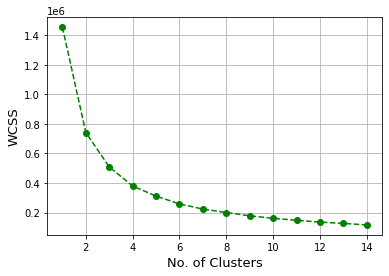

In [290]:
clusters = range(1, len(wcss)+1)
plt.plot(clusters, wcss, 'go--')
plt.xlabel("No. of Clusters", fontsize=13)
plt.ylabel("WCSS", fontsize=13)
plt.grid()
plt.show()

In [291]:
km = KMeans(n_clusters=4)

In [292]:
km.fit(X)

KMeans(n_clusters=4)

In [293]:
y = km.predict(X)

In [307]:
cluster_data['Label'] = y.astype(str)

In [310]:
px.scatter(data_frame=cluster_data, x='IMDb', y='Rotten Tomatoes', color='Label', hover_name='Title',
          color_discrete_sequence=px.colors.qualitative.G10,
          title="Clustering of Show Titles with respect to Ratings")